In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from matplotlib import pyplot as plt
import numpy as np
with MPRester ("rmVZuN7gqE6pdzRC") as m : 
    struct = m.get_structure_by_material_id("mp-661")
    newCifFile = CifWriter (struct)
    newCifFile.write_file("structure_mp661.cif")

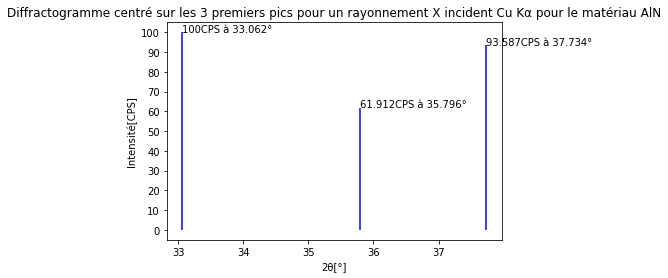

In [3]:
#Création du graphe de Materials Project avec seulement les 3 premiers pics
plt.title("Diffractogramme centré sur les 3 premiers pics pour un rayonnement X incident Cu K\u03B1 pour le matériau AlN")
plt.xlabel('2\u03B8[\u00b0]')
plt.ylabel('Intensité[CPS]')
plt.xticks(np.arange(30,40,1))
plt.yticks(np.arange(0,101,10))
#3pics à plot:
angles=[33.062,35.796,37.734]
amplitudes= [100,61.912,93.587]
origine=[0,0,0]
#plot
plt.vlines(angles,origine,amplitudes,color='blue')
plt.text(angles[0],amplitudes[0],'100CPS à 33.062°')
plt.text(angles[1],amplitudes[1],'61.912CPS à 35.796°')
plt.text(angles[2],amplitudes[2],'93.587CPS à 37.734°')
plt.show()

In [4]:
#Création de l'objet XRD avec la longueur d'onde de l'énoncé
XRD = XRDCalculator(1.54060)
#Récupération du pattern du modèle de diffraction
Dif = XRD.get_pattern(struct)
#Print des informations sur les pics par XRDCalculator
print('Informations plus précises fournies par XRDCalculator sur les 3pics:')
#1
print('Premier pic : ')
print('2\u03B8[\u00b0] =', (Dif.x)[0])
print('I [CPS] =', (Dif.y)[0])
print('Indices (hkl) :' , Dif.hkls[0], '\n')
#2
print('Deuxième pic : ')
print('2\u03B8[\u00b0] =', (Dif.x)[1])
print('I [CPS] =', (Dif.y)[1])
print('Indices (hkl) :' , Dif.hkls[1], '\n')
#3
print('Troisième pic : ')
print('2\u03B8(\u00b0) =', (Dif.x)[2])
print('I [CPS] =', (Dif.y)[2])
print('Indices (hkl) :' , Dif.hkls[2])








Informations plus précises fournies par XRDCalculator sur les 3pics:
Premier pic : 
2θ[°] = 33.034333028794656
I [CPS] = 99.99999999999999
Indices (hkl) : [{'hkl': (1, 0, -1, 0), 'multiplicity': 6}] 

Deuxième pic : 
2θ[°] = 35.766534087984596
I [CPS] = 61.91403470284552
Indices (hkl) : [{'hkl': (0, 0, 0, 2), 'multiplicity': 2}] 

Troisième pic : 
2θ(°) = 37.70263638348639
I [CPS] = 93.59134326650084
Indices (hkl) : [{'hkl': (1, 0, -1, 1), 'multiplicity': 12}]


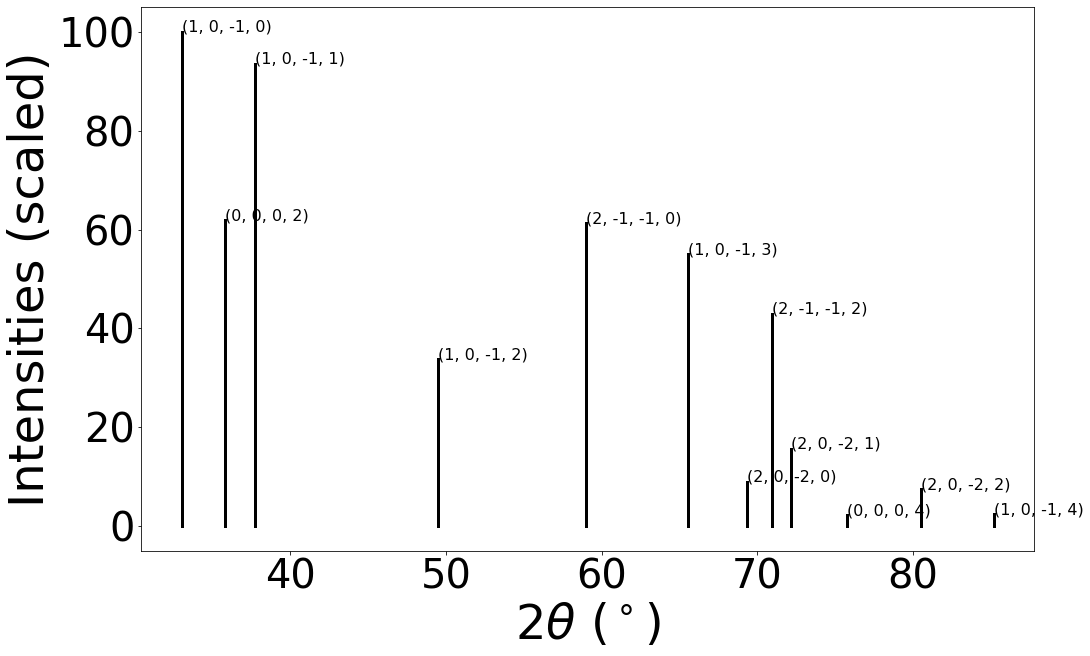

In [6]:
XRD.show_plot(struct,annotate_peaks=True)